In [74]:
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [75]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# Build VGG model: input_shape=IMAGE_SIZE + [3] indicates that the images are of size IMAGE_SIZE and are RGB, 
# weights='imagenet' model should be initialized with pre-trained weights from the ImageNet dataset
# include_top=False using the model without the top layer or output layer
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [76]:
# useful for getting number of classes
folders = glob('Datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)  

In [77]:

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''ImageDataGenerator is commonly used for data augmentation and preprocessing during training of deep learning models,
particularly for image data.
rescale = 1./255: rescales the pixel values of the images to be between 0 and 1. 
Dividing by 255 achieves this, as pixel values typically range from 0 to 255.
shear_range = 0.2: distort the shapes of objects in an image along a given axis. 
zoom_range = 0.2: randomly zoom into the images by a factor within the specified range.
A zoom_range of 0.2 means that images will be zoomed in or out by up to 20%.
horizontal_flip = True: whether random horizontal flips will be applied to the images. 
Flipping an image horizontally means that it is flipped along the vertical axis,
'''

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 110 images belonging to 3 classes.
Found 151 images belonging to 3 classes.


In [79]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5
)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 90s 25s/step - accuracy: 0.8588 - loss: 0.6176 - val_accuracy: 0.4901 - val_loss: 2.0761
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 77s 22s/step - accuracy: 0.8630 - loss: 0.4079 - val_accuracy: 0.9735 - val_loss: 0.1001
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 71s 20s/step - accuracy: 0.9616 - loss: 0.0973 - val_accuracy: 0.5364 - val_loss: 0.9013
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 71s 20s/step - accuracy: 0.9632 - loss: 0.0921 - val_accuracy: 0.6887 - val_loss: 0.6996
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 69s 20s/step - accuracy: 0.9662 - loss: 0.0526 - val_accuracy: 0.9934 - val_loss: 0.0415


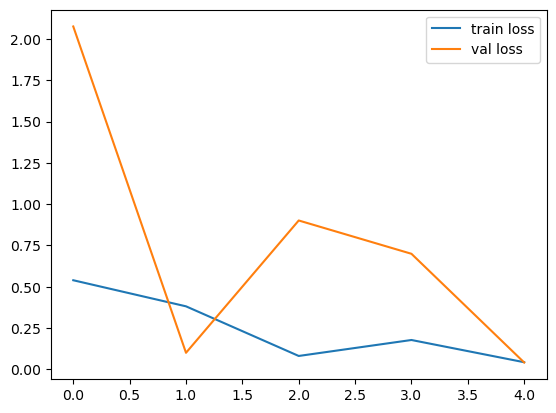

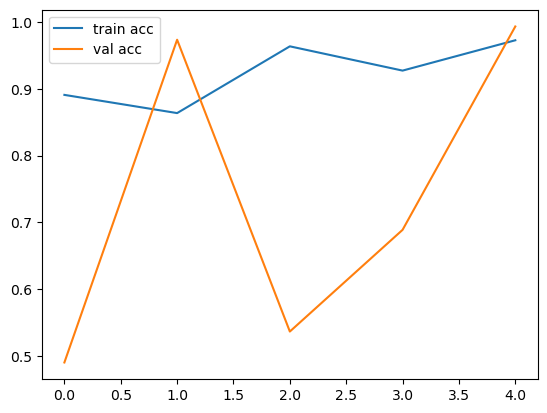

<Figure size 640x480 with 0 Axes>

In [80]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [81]:
model.save('vgg16_fr.h5')